In [1]:
import os
import pandas as pd
import numpy as np

import re # regular expressions 

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool
from bokeh.sampledata.glucose import data

output_notebook()

# data source - US Federal Emergency Management Agency
# https://www.fema.gov/media-library/assets/documents/28318

Loading BokehJS ...

In [2]:
df = pd.read_csv("DisasterDeclarationsSummaries.csv", sep=',')
df.head(3)

,disasterNumber,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,state,declarationDate,fyDeclared,disasterType,incidentType,title,incidentBeginDate,incidentEndDate,disasterCloseOutDate,declaredCountyArea,placeCode,hash,lastRefresh
0,1,0,1,1,1,GA,1953-05-02T00:00:00.000Z,1953,DR,Tornado,TORNADO,1953-05-02T00:00:00.000Z,1953-05-02T00:00:00.000Z,1954-06-01T00:00:00.000Z,NaN,NaN,e6f77c3a97c63d478bf14c9a58f60a0d,2018-02-09T14:38:26.149Z
1,3,0,1,1,1,LA,1953-05-29T00:00:00.000Z,1953,DR,Flood,FLOOD,1953-05-29T00:00:00.000Z,1953-05-29T00:00:00.000Z,1960-02-01T00:00:00.000Z,NaN,NaN,a6dd526e79d7292ae21a7f9430422931,2018-02-09T14:38:26.144Z
2,9,0,1,1,1,TX,1953-06-19T00:00:00.000Z,1953,DR,Flood,FLOOD,1953-06-19T00:00:00.000Z,1953-06-19T00:00:00.000Z,1958-01-01T00:00:00.000Z,NaN,NaN,4cd4150b6fb47c91e50e3c466726ea67,2018-02-09T14:38:26.288Z


In [3]:
# create months column, convert key columns to int type, and sort
# df['monthDeclared'] = 
df.insert(8, 'monthDeclared',df['declarationDate'].str.slice(5,7).astype(int))
df['fyDeclared'] = df['fyDeclared'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49158 entries, 0 to 49157
Data columns (total 19 columns):
disasterNumber          49158 non-null int64
ihProgramDeclared       49158 non-null int64
iaProgramDeclared       49158 non-null int64
paProgramDeclared       49158 non-null int64
hmProgramDeclared       49158 non-null int64
state                   49158 non-null object
declarationDate         49158 non-null object
fyDeclared              49158 non-null int32
monthDeclared           49158 non-null int32
disasterType            49158 non-null object
incidentType            49158 non-null object
title                   49158 non-null object
incidentBeginDate       49158 non-null object
incidentEndDate         48756 non-null object
disasterCloseOutDate    38822 non-null object
declaredCountyArea      48957 non-null object
placeCode               48957 non-null float64
hash                    49158 non-null object
lastRefresh             49158 non-null object
dtypes: float64(1), int

In [4]:
df.sort_values(by=['fyDeclared', 'monthDeclared'], ascending=True, inplace=True)
df.head(5)

,disasterNumber,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,state,declarationDate,fyDeclared,monthDeclared,disasterType,incidentType,title,incidentBeginDate,incidentEndDate,disasterCloseOutDate,declaredCountyArea,placeCode,hash,lastRefresh
0,1,0,1,1,1,GA,1953-05-02T00:00:00.000Z,1953,5,DR,Tornado,TORNADO,1953-05-02T00:00:00.000Z,1953-05-02T00:00:00.000Z,1954-06-01T00:00:00.000Z,NaN,NaN,e6f77c3a97c63d478bf14c9a58f60a0d,2018-02-09T14:38:26.149Z
1,3,0,1,1,1,LA,1953-05-29T00:00:00.000Z,1953,5,DR,Flood,FLOOD,1953-05-29T00:00:00.000Z,1953-05-29T00:00:00.000Z,1960-02-01T00:00:00.000Z,NaN,NaN,a6dd526e79d7292ae21a7f9430422931,2018-02-09T14:38:26.144Z
56,2,0,1,1,1,TX,1953-05-15T00:00:00.000Z,1953,5,DR,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953-05-15T00:00:00.000Z,1958-01-01T00:00:00.000Z,NaN,NaN,15b902cd3d72b189d8298e383fa97433,2018-02-09T14:38:26.198Z
2,9,0,1,1,1,TX,1953-06-19T00:00:00.000Z,1953,6,DR,Flood,FLOOD,1953-06-19T00:00:00.000Z,1953-06-19T00:00:00.000Z,1958-01-01T00:00:00.000Z,NaN,NaN,4cd4150b6fb47c91e50e3c466726ea67,2018-02-09T14:38:26.288Z
7,5,0,1,1,1,MT,1953-06-06T00:00:00.000Z,1953,6,DR,Flood,FLOODS,1953-06-06T00:00:00.000Z,1953-06-06T00:00:00.000Z,1955-12-01T00:00:00.000Z,NaN,NaN,e7d2763d2bbece77c1d9d404cdfd7795,2018-02-09T14:38:26.287Z


In [5]:
df['monthDeclared'].unique().tolist()

[5, 6, 7, 10, 2, 3, 8, 9, 12, 4, 11, 1]

In [6]:
# drop all rows where the location is unknown (or null)
df = df.dropna(subset=['placeCode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48957 entries, 43 to 49134
Data columns (total 19 columns):
disasterNumber          48957 non-null int64
ihProgramDeclared       48957 non-null int64
iaProgramDeclared       48957 non-null int64
paProgramDeclared       48957 non-null int64
hmProgramDeclared       48957 non-null int64
state                   48957 non-null object
declarationDate         48957 non-null object
fyDeclared              48957 non-null int32
monthDeclared           48957 non-null int32
disasterType            48957 non-null object
incidentType            48957 non-null object
title                   48957 non-null object
incidentBeginDate       48957 non-null object
incidentEndDate         48558 non-null object
disasterCloseOutDate    38625 non-null object
declaredCountyArea      48957 non-null object
placeCode               48957 non-null float64
hash                    48957 non-null object
lastRefresh             48957 non-null object
dtypes: float64(1), in

In [7]:
# what kind of incidents exist in this data?
df_count = pd.DataFrame(df['incidentType'].unique())
df_count

,0
0,Flood
1,Tornado
2,Earthquake
3,Severe Storm(s)
4,Drought
5,Hurricane
6,Typhoon
7,Fire
8,Severe Ice Storm
9,Freezing


In [8]:
# we are interested in fires
# drop all rows that are not Fires
df = df[pd.Series(df['incidentType']).str.contains('Fire')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 954 to 49134
Data columns (total 19 columns):
disasterNumber          3022 non-null int64
ihProgramDeclared       3022 non-null int64
iaProgramDeclared       3022 non-null int64
paProgramDeclared       3022 non-null int64
hmProgramDeclared       3022 non-null int64
state                   3022 non-null object
declarationDate         3022 non-null object
fyDeclared              3022 non-null int32
monthDeclared           3022 non-null int32
disasterType            3022 non-null object
incidentType            3022 non-null object
title                   3022 non-null object
incidentBeginDate       3022 non-null object
incidentEndDate         2623 non-null object
disasterCloseOutDate    2452 non-null object
declaredCountyArea      3022 non-null object
placeCode               3022 non-null float64
hash                    3022 non-null object
lastRefresh             3022 non-null object
dtypes: float64(1), int32(2), int64(5), o

In [9]:
df.fyDeclared.unique()

array([1967, 1970, 1973, 1976, 1977, 1978, 1981, 1982, 1985, 1987, 1988,
       1990, 1991, 1992, 1993, 1996, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

In [10]:
months = sorted(df.monthDeclared.unique());

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


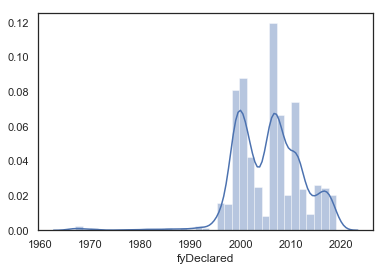

In [11]:
sns.distplot(df.fyDeclared);

In [12]:
# bokeh notebook

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.sampledata.commits import data
from bokeh.transform import jitter

output_notebook()

MONTHS = [str(i) for i in months]

source = ColumnDataSource(df)

plot = figure(plot_width=950, plot_height=300, y_range=MONTHS, x_axis_type='linear',
           title="US Fire Incidents 1953-2020")

plot.circle(x='fyDeclared', y=jitter('monthDeclared', width=0.6, range=plot.y_range),  source=source, alpha=0.3)
plot.xaxis.axis_label = 'Year'
plot.xaxis.axis_label_text_font_style = "bold"
plot.yaxis.axis_label = 'Month #'
plot.yaxis.axis_label_text_font_style = "bold"

plot.ygrid.grid_line_color = None

show(plot);

Loading BokehJS ...

In [13]:
df_summary = df.groupby(['fyDeclared']).size().reset_index(name="annual_#_of_fires")

In [14]:
# bokeh notebook

x, y = df_summary['fyDeclared'], df_summary['annual_#_of_fires']

# Basic plot setup
plot = figure(plot_width=900, plot_height=500,
              x_axis_type="linear", tools="pan,xzoom_in,reset",
              toolbar_location="below", 
              title='Annual # of Wildfires:  1953-2018')

plot.background_fill_color = "black"
plot.background_fill_alpha = 0.005

plot.line(x, y, line_dash="4 4", line_width=1, color='gray')
plot.xaxis.axis_label = 'Year'
plot.xaxis.axis_label_text_font_style = "bold"
plot.yaxis.axis_label = '# of Fires'
plot.yaxis.axis_label_text_font_style = "bold"

cr = plot.circle(x, y, size=25,
                fill_color="grey", hover_fill_color="firebrick",
                fill_alpha=0.15, hover_alpha=0.3,
                line_color=None, hover_line_color="white")

source = ColumnDataSource(df_summary)
TOOLTIPS = [("DATE", '$fyDeclared')]
plot.add_tools(HoverTool(tooltips=TOOLTIPS, renderers=[cr], mode='vline'))

show(plot)


In [15]:
df_summary_months = df.groupby(['fyDeclared', 'monthDeclared']).size().reset_index(name="monthly_fires_by_year")
df_summary_months['fires_this_year'] = df.groupby(['fyDeclared'])['fyDeclared'].agg('sum')
df_summary_months

,fyDeclared,monthDeclared,monthly_fires_by_year,fires_this_year
0,1967,8,10,NaN
1,1970,9,6,NaN
2,1973,10,1,NaN
3,1976,12,1,NaN
4,1977,1,1,NaN
5,1978,10,1,NaN
6,1981,11,4,NaN
7,1982,4,1,NaN
8,1982,12,1,NaN
9,1985,7,6,NaN
